# Step 1 - Pre-Work Data Check

## Agenda:

    1) Data check:
        a. Customers csv
        b. Items csv
        c. orders csv
        d. products csv
    2) Extra -  just for fun analysis

 We will be looking at the data given with the objective to:
  
     1) Detect the useful champs for our mission.
     2) Evaluate data regarding:
     
        Values:          Values are in the right column.
        Completeness:    No Missing values in a rows.
        Format:          Same format.
        Duplicates:      No row should be exact equal.
  
   

##   Import Files and modules


In [458]:
import pandas as pd
import numpy as np

customer    = pd.read_csv("customer.csv")
items       = pd.read_csv("items.csv")
orders      = pd.read_csv("orders.csv")
products    = pd.read_csv("products.csv")

## 2) Data check

#### a. Customer csv

*For this data set we are only interested in the customer_id and customer_unique_id.*

In [6]:
customer.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP


In [413]:
#check missing/null/distinct values
missing = pd.DataFrame( data = [ customer.nunique(),customer.notnull().sum() , customer.isna().sum() , ((customer.isna().sum()/ customer.count())*100)])
missing.index=[ "unique values","not null values","missing values", "percentage"]
missing.transpose()

,unique values,not null values,missing values,percentage
customer_id,99441.0,99443.0,0.0,0.000000
customer_unique_id,96096.0,99442.0,1.0,0.001006
customer_zip_code_prefix,14994.0,99442.0,1.0,0.001006
customer_city,4119.0,99441.0,2.0,0.002011
customer_state,27.0,99443.0,0.0,0.000000


In [416]:
print("unique cols = " + str(customer.columns.is_unique),"\nunique index = " + str( customer.index.is_unique), "\nduplicated rows = " + str(customer.duplicated().sum()) )

unique cols = True 
unique index = True 
duplicated rows = 0


#### Observations :
1) Customer_unique_id is not as unique as customer_id (even if it has 2 repeated users).
2) The amount of missing values in the rest of the columns is negligible (even if we will not use them). 
3) No duplicate Rows.









---




## b. Items

*Here we are interested in the **order_id, order_item_id, price, frieght_value and shipping_limit_date** *

In [127]:
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [176]:
missing = pd.DataFrame( data = [ items.nunique(),items.notnull().sum() , items.isna().sum() , ((items.isna().sum()/ items.count())*100), items.nunique()/items.notnull().sum()*100])
missing.index=[ "unique values","not null values","missing values", "percentage", 'distinct_%']
missing.transpose()

,unique values,not null values,missing values,percentage,distinct_%
order_id,98666.0,112650.0,0.0,0.0,87.586329
order_item_id,21.0,112650.0,0.0,0.0,0.018642
product_id,32951.0,112650.0,0.0,0.0,29.250777
seller_id,3095.0,112650.0,0.0,0.0,2.747448
shipping_limit_date,93318.0,112650.0,0.0,0.0,82.838881
price,5968.0,112650.0,0.0,0.0,5.297825
freight_value,6999.0,112650.0,0.0,0.0,6.213049


##### >> order_item_id 

In [452]:
#check the data is numeric and no irregular values
items['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

##### >> price and freight_value

In [623]:
#check if all rows have numeric values, if not a error should 'raise' otherwise the max number
items['price'].apply(pd.to_numeric, errors='raise').max()

6735.0

In [624]:
#Same as price 
items['freight_value'].apply(pd.to_numeric, errors='raise').max()

409.68

##### >> shipping_limit_date

In [554]:
#Check dates are ok : get all years in shipping limit date collumn
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])
items['shipping_limit_date'].dt.year.unique()

array([2017, 2018, 2016, 2020], dtype=int64)



#### Observations :
>1) Order_id has duplicates because of re-order of the same item (found in order_item_id). Could be good idea to create a new champ to hava a unique_order_id.
>2) No missing values/ nor duplicate rows. 
>3) Date time shipping_limit_date is well formated in 'shipping_limit_date'
>4) Price and freight_value are well formated and no value is missing.




---

## c. Orders

*For this data set we are only interested in the* **order_id**, **customer_id**, **order_status, order_purchase_timestamp** and **order_estimated_delivery_date** *(since is the most non-missing date).* 

In [194]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [196]:
missing = pd.DataFrame( data = [ orders.nunique(),orders.notnull().sum() , orders.isna().sum() , ((orders.isna().sum()/ orders.count())*100)])
missing.index=[ "unique values","not null values","missing values", "percentage"]
missing.transpose()

,unique values,not null values,missing values,percentage
order_id,99441.0,99441.0,0.0,0.000000
customer_id,99441.0,99441.0,0.0,0.000000
order_status,9.0,99441.0,0.0,0.000000
order_purchase_timestamp,98876.0,99441.0,0.0,0.000000
order_approved_at,90734.0,99281.0,160.0,0.161159
order_delivered_carrier_date,81018.0,97658.0,1783.0,1.825759
order_delivered_customer_date,95664.0,96476.0,2965.0,3.073303
order_estimated_delivery_date,461.0,99440.0,1.0,0.001006


##### >> order status 

In [418]:
#Check all different order status 
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved', '2018-02-12 11:28:47'],
      dtype=object)

In [464]:
#how many wrong status exist? 
orders[orders['order_status'] == '2018-02-12 11:28:47' ]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_estimated_delivery_date2,order_estimated_delivery_date_year
73892,2d3ae8314361346376456addbeb7e5ed,99895a9b5ea7a5e7b2bd960ade35f89a,2018-02-12 11:28:47,2018-02-12 12:28:03,2018-02-14 20:17:57,2018-02-19 12:09:33,2018-03-15 00:00:00,NaN,NaN,nan


##### >> order_purchase_timestamp

In [454]:
# check dates are correct at 'order_delivered_carrier_date' 
orders['order_purchase_timestamp2']= pd.to_datetime(orders['order_purchase_timestamp'] ,errors='ignore')
orders['order_purchase_timestamp2'].to_list()
orders['order_purchase_timestamp_year'] = orders['order_purchase_timestamp2'].apply(lambda x: str(x)[0:4])
orders['order_purchase_timestamp_year'].unique()

array(['2017', '2018', '0000', '2016', '2077'], dtype=object)

In [457]:
#how many 'order_purchase_timestamp_year' are wrong? 
m1 = (orders['order_purchase_timestamp_year'] == '2077') | (orders['order_purchase_timestamp_year'] == 'nan') | (orders['order_purchase_timestamp_year'] == '0000')
orders[m1 ]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_estimated_delivery_date2,order_estimated_delivery_date_year,order_approved_at2,order_approved_at_year,order_delivered_carrier_date2,order_delivered_carrier_date_year,order_purchase_timestamp2,order_purchase_timestamp_year
130,01855f880aae9a984c7c33b26fcf2e02,2e068340b3037f667ce3224bd59260af,delivered,0000-10-19 15:08:48,0000-10-19 15:35:35,0000-10-23 13:14:16,0000-10-24 15:57:46,0000-10-31 00:00:00,0000-10-31 00:00:00,0000,0000-10-19 15:35:35,0000,0000-10-23 13:14:16,0000,0000-10-19 15:08:48,0000
72442,e6a09c11fa9d7a43d90955406cab553c,ef2415ea1854ac041c3700df551dd63e,delivered,2077-08-15 07:55:36,2077-08-15 08:05:24,2077-08-17 15:31:03,2077-08-23 18:10:27,2077-09-04 00:00:00,2077-09-04 00:00:00,2077,2077-08-15 08:05:24,2077,2077-08-17 15:31:03,2077,2077-08-15 07:55:36,2077


##### >> order_estimated_delivery_date

In [460]:
# get all the date years and check data 
orders['order_estimated_delivery_date2']= pd.to_datetime(orders['order_estimated_delivery_date'] ,errors='ignore')
orders['order_estimated_delivery_date2'].to_list()
orders['order_estimated_delivery_date_year'] = orders['order_estimated_delivery_date2'].apply(lambda x: str(x)[0:4])
orders['order_estimated_delivery_date_year'].unique()

array(['2017', '2018', '0000', '2016', '2077', 'nan'], dtype=object)

In [461]:
orders[(orders['order_estimated_delivery_date_year'] == '2077') | (orders['order_estimated_delivery_date_year'] == 'nan') | (orders['order_estimated_delivery_date_year'] == '0000')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_estimated_delivery_date2,order_estimated_delivery_date_year
130,01855f880aae9a984c7c33b26fcf2e02,2e068340b3037f667ce3224bd59260af,delivered,0000-10-19 15:08:48,0000-10-19 15:35:35,0000-10-23 13:14:16,0000-10-24 15:57:46,0000-10-31 00:00:00,0000-10-31 00:00:00,0000
72442,e6a09c11fa9d7a43d90955406cab553c,ef2415ea1854ac041c3700df551dd63e,delivered,2077-08-15 07:55:36,2077-08-15 08:05:24,2077-08-17 15:31:03,2077-08-23 18:10:27,2077-09-04 00:00:00,2077-09-04 00:00:00,2077
73892,2d3ae8314361346376456addbeb7e5ed,99895a9b5ea7a5e7b2bd960ade35f89a,2018-02-12 11:28:47,2018-02-12 12:28:03,2018-02-14 20:17:57,2018-02-19 12:09:33,2018-03-15 00:00:00,NaN,NaN,nan



#### Observations :
>1) There are several missing values, however the main col 'order_id' and 'customer_id' have no missing values.
>2) Typo:  row = 73892 wrong order_status, and delivery date missing.
>3) Typo:  row = 72442 has the wrong year, it cant be delivered already in year 2077.
>4) Typo:  row = 130 th eyear is missing in all colls.





---


## d. Products

*For this data set we are only interested in the* **product_id** * and **product_weight_g**  

In [471]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure


In [479]:
missing = pd.DataFrame( data = [ products.nunique(),products.notnull().sum() , products.isna().sum() , ((products.isna().sum()/ products.count())*100)])
missing.index=[ "unique values","not null values","missing values", "percentage"]
missing.transpose()

,unique values,not null values,missing values,percentage
product_id,32952.0,32952.0,0.0,0.000000
product_category_name,71.0,32328.0,624.0,1.930215
product_name_lenght,66.0,32341.0,611.0,1.889243
product_description_lenght,2960.0,32341.0,611.0,1.889243
product_photos_qty,20.0,32342.0,610.0,1.886092
product_weight_g,2205.0,32950.0,2.0,0.006070
product_length_cm,99.0,32950.0,2.0,0.006070
product_height_cm,102.0,32950.0,2.0,0.006070
product_width_cm,95.0,32949.0,3.0,0.009105
product_category_name_english,71.0,32328.0,624.0,1.930215


In [487]:
products[products['product_weight_g'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
8579,09ff539a621711667c43eba6a3bd8466,baby,60.0,865.0,3.0,NaN,NaN,NaN,NaN,baby
18852,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [627]:
#besides the 2 mising values showned before lets check other values and negative ones
products['product_weight_g'].apply(pd.to_numeric, errors='raise').min()

0.0

In [557]:
products.iloc[8579] 

product_id                       09ff539a621711667c43eba6a3bd8466
product_category_name                                        baby
product_name_lenght                                            60
product_description_lenght                                    865
product_photos_qty                                              3
product_weight_g                                              NaN
product_length_cm                                             NaN
product_height_cm                                             NaN
product_width_cm                                              NaN
product_category_name_english                                baby
test                                                          NaN
Name: 8579, dtype: object


#### Observations :
>1) There are several missing values, however the main col 'order_id' and 'customer_id' have no missing values.
>2) Typo:  row = 73892 wrong order_status, and delivery date missing.
>3) Typo:  row = 72442 has the wrong year, it cant be delivered already in year 2077.
>4) Typo:  row = 130 th eyear is missing in all colls.

---
---

## EXTRA - Small analysis on the data

## Customers

In [415]:
#Get top 5 Cities 
customer_count = customer.groupby('customer_city').count()['customer_id'].sort_values(ascending=False).head(5)

# checking the cities distribution
print(customer_count,'\n---\n', customer.groupby('customer_city').count()['customer_id'].describe(),'\n---')


customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_id, dtype: int64 
---
 count     4119.000000
mean        24.142025
std        279.272382
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max      15540.000000
Name: customer_id, dtype: float64 
---


>High concentration of customers on top cities (example : Sao Paulo 15.6%).

## Items

In [326]:
items['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [350]:
for x in [300,400,500,600]:
    print(items[items['price']>x].count()[0]/112650*100)

6.158011540168664
3.762982689747004
2.854860186418109
2.0550377274744784


In [347]:
6937/112650*100

6.158011540168664

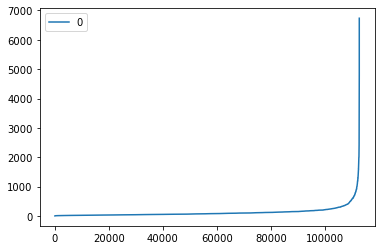

In [338]:
pd.DataFrame(np.sort(items['price'])).plot()

> There is a tiny amount of price outliers. Only 6% of products are over 300 in price.

In [171]:
itemdf= pd.DataFrame(items.groupby('product_id').count()['order_id'].sort_values(ascending=False)) #count products + sort from most used to least
itemdf['prod_cum_sum']=items.groupby('product_id').count()['order_id'].sort_values(ascending=False).cumsum() #add a cumulative sum col
itemdf['prod_%']=items.groupby('product_id').count()['order_id'].sort_values(ascending=False)/112650 *100 #with percentage
itemdf['prod_cum_%']=itemdf['prod_%'].cumsum() #%cumulative sum
itemdf.reset_index(level=0, inplace=True) #take out the prod_id and replace for 0,1,2..
itemdf['counts'] = itemdf['order_id'] # change the name to counts
itemdf.drop(['product_id','order_id'], axis =1, inplace=True) # drop the unused cols
itemdf = itemdf.reindex(columns=['counts','prod_cum_sum', 'prod_%', 'prod_cum_%']) # order columns
itemdf.head(3), itemdf.head(3) 

(   counts  prod_cum_sum    prod_%  prod_cum_%
 0     527           527  0.467821    0.467821
 1     488          1015  0.433200    0.901021
 2     484          1499  0.429649    1.330670,
        counts  prod_cum_sum    prod_%  prod_cum_%
 32948       1        112648  0.000888   99.998225
 32949       1        112649  0.000888   99.999112
 32950       1        112650  0.000888  100.000000)

In [325]:
itemdf[itemdf['prod_cum_%']>60].head(1)

,counts,prod_cum_sum,prod_%,prod_cum_%
4587,5,67590,0.004439,60.0


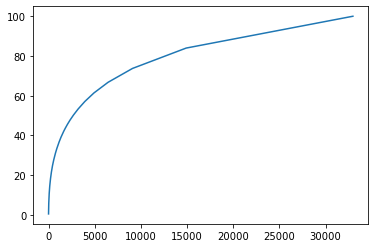

In [180]:
 itemdf['prod_cum_%'].plot()

> Pareto: The vast mayority of orders are from a small amount of products ( 14% of products make more than 60% of all orders)

## Orders

In [463]:
d1 = orders[orders['order_status'] == 'delivered']
m2 = orders[orders['order_status'] =='delivered']['order_approved_at'].isna()
d1[m2].head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_estimated_delivery_date2,order_estimated_delivery_date_year
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00,2017-03-17 00:00:00,2017
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00,2017-03-21 00:00:00,2017
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00,2017-03-17 00:00:00,2017


> There were 16 orders that were delivered and NOT approved.